# Project Title : Predicting Health Insurance Price for an individual or family
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. Gender
2. Smoking_status
3. Location
## Ordinal :

## DISCRETE: 
4. age
5. Children

## Continuous
6. BMI
7. health_insurance_price

In [267]:
import pandas as pd

In [268]:
import numpy as np

In [269]:
from sklearn.preprocessing import StandardScaler

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
from sklearn.linear_model import LinearRegression

In [272]:
from sklearn.preprocessing import LabelEncoder

In [273]:
from sklearn.metrics import accuracy_score

In [274]:
from sklearn.metrics import r2_score,mean_squared_error

In [275]:
import matplotlib.pyplot as plt

In [276]:
import seaborn as sns

In [277]:
from sklearn.ensemble import RandomForestRegressor

In [278]:
import xgboost as xgb

In [279]:
from sklearn.tree import DecisionTreeRegressor 

In [280]:
from sklearn.metrics import r2_score

In [281]:
from sklearn.neighbors import KNeighborsRegressor

In [282]:
from sklearn.ensemble import ExtraTreesRegressor

In [283]:
df=pd.read_csv('Health_insurance_cost.csv')

In [284]:
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [285]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [286]:
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

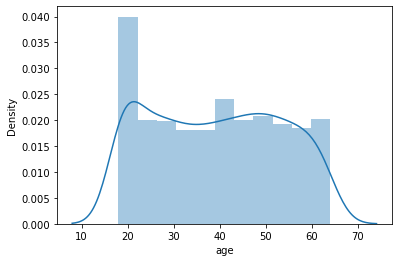

In [287]:
sns.distplot(df['age'])

In [288]:
mean_val=df['age'].mean()

In [289]:
df['age'].fillna(mean_val,inplace=True)

In [290]:
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

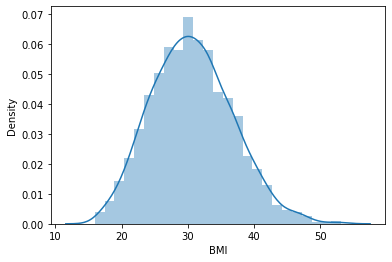

In [291]:
sns.distplot(df['BMI'])

In [292]:
mean_val=df['BMI'].mean()


In [293]:
df['BMI'].fillna(mean_val,inplace=True)

In [294]:
df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    2
dtype: int64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

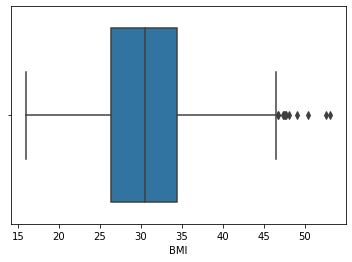

In [295]:
sns.boxplot(df['BMI'])

In [296]:
q1=df['BMI'].quantile(0.25)

In [297]:
q3=df['BMI'].quantile(0.75)

In [298]:
IQR=q3-q1

In [299]:
lower=q1-1.5*IQR

In [300]:
higher=q3+1.5*IQR

In [301]:
df=df[(df['BMI']>lower) & (df['BMI']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

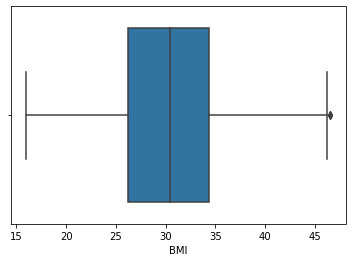

In [302]:
sns.boxplot(df['BMI'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

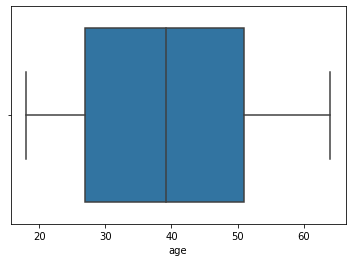

In [303]:
sns.boxplot(df['age'])

In [304]:
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.638217,0,yes,southwest,16884.92400
1,18.0,male,33.770000,1,no,southeast,1725.55230
2,28.0,male,33.000000,3,no,southeast,4449.46200
3,33.0,male,22.705000,0,no,northwest,21984.47061
4,32.0,male,28.880000,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970000,3,no,northwest,10600.54830
1334,18.0,female,31.920000,0,no,northeast,2205.98080
1335,18.0,female,36.850000,0,no,southeast,1629.83350
1336,21.0,female,25.800000,0,no,southwest,2007.94500


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

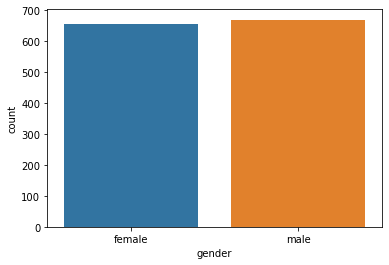

In [305]:
sns.countplot(df['gender'])

In [306]:
df.groupby("gender").size()

gender
female    657
male      670
dtype: int64

# Observations:
1. Females are more than males

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Children', ylabel='count'>

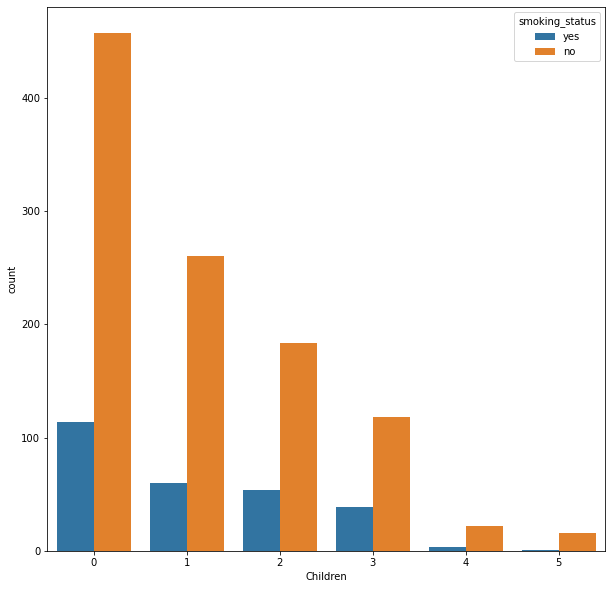

In [307]:
plt.figure(figsize=(10,10))
sns.countplot(df['Children'],hue=df['smoking_status'])

In [350]:
df.groupby(['Children','smoking_status']).size()

Children  smoking_status
0         no                457
          yes               114
1         no                260
          yes                60
2         no                183
          yes                54
3         no                118
          yes                39
4         no                 22
          yes                 3
5         no                 16
          yes                 1
dtype: int64

# Observations:
1. Persons with no children and who don't smoke are maximum as compared to other persons having different number of childrens.
2. Person with 5 children and who smoke are minimum as compared to other persons having different number of childrens.


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

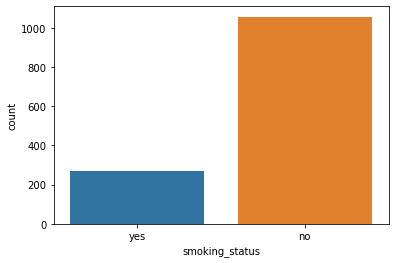

In [308]:
sns.countplot(df['smoking_status'])

# Observations:
1. Persons who don't smoke are more as compared to persons who smoke

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location', ylabel='count'>

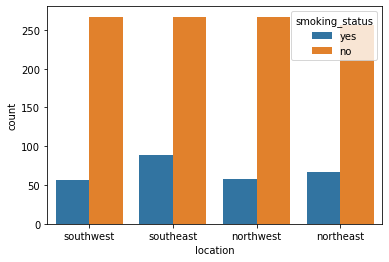

In [309]:
sns.countplot(df['location'],hue=df['smoking_status'])

In [310]:
df.groupby("location")['smoking_status'].value_counts()

location   smoking_status
northeast  no                256
           yes                67
northwest  no                267
           yes                58
southeast  no                267
           yes                89
southwest  no                266
           yes                57
Name: smoking_status, dtype: int64

# Observations:
1. Persons who do not smoke are more in southeast and northwest as compared to persons who do not smoke in other location.
2. Persons who smoke are more in southeast as compared to persons who smoke in other location.

<AxesSubplot:xlabel='gender', ylabel='age'>

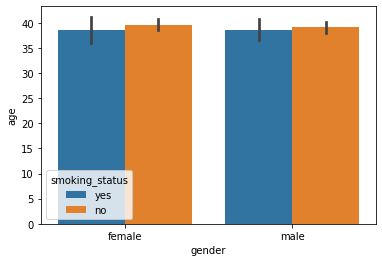

In [311]:
sns.barplot(x=df['gender'],y=df['age'],hue=df['smoking_status'])

In [312]:
df.groupby(["gender","smoking_status"])['age'].mean()

gender  smoking_status
female  no                39.507347
        yes               38.535391
male    no                39.046544
        yes               38.628689
Name: age, dtype: float64

# Observations:
1. male person who smoke have highest avg age  as compared to female person who smoke.
2. female person who do not smoke have highest avg age  as compared to male person who do not smoke.


<AxesSubplot:xlabel='gender', ylabel='health_insurance_price'>

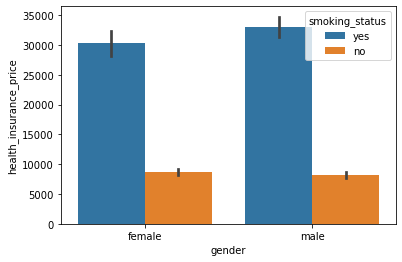

In [313]:
sns.barplot(x=df['gender'],y=df['health_insurance_price'],hue=df['smoking_status'])

In [314]:
df.groupby(['gender','smoking_status'])['health_insurance_price'].mean()

gender  smoking_status
female  no                 8748.920482
        yes               30300.579770
male    no                 8109.066367
        yes               32969.478176
Name: health_insurance_price, dtype: float64

# Observations:
1. male person who smoke have high health_insurance_price  as compared to female person who smoke.
2. female person who do not smoke have high health_insurance_price  as compared to male person who do not smoke.


<AxesSubplot:xlabel='gender', ylabel='BMI'>

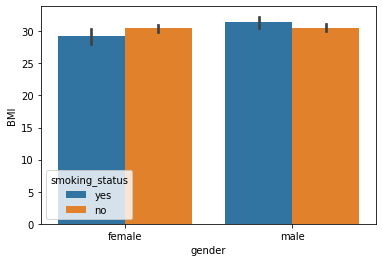

In [315]:
sns.barplot(x=df['gender'],y=df['BMI'],hue=df['smoking_status'])

In [316]:
df.groupby(['gender','smoking_status'])['BMI'].mean()

gender  smoking_status
female  no                30.432247
        yes               29.198935
male    no                30.552017
        yes               31.390757
Name: BMI, dtype: float64

# Observations:
1. male person who smoke and don't smoke have high BMI  as compared to female person who smoke.


<AxesSubplot:xlabel='gender', ylabel='health_insurance_price'>

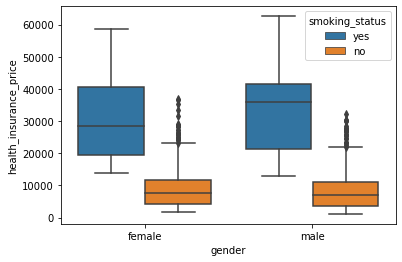

In [317]:
sns.boxplot(x=df['gender'],y=df['health_insurance_price'],hue=df['smoking_status'])

In [318]:
df.groupby(['gender','smoking_status'])['health_insurance_price'].mean()

gender  smoking_status
female  no                 8748.920482
        yes               30300.579770
male    no                 8109.066367
        yes               32969.478176
Name: health_insurance_price, dtype: float64

# Observations:
1. male persons who smokers have avg health_insurance_price more as compared to female smokers avg health_insurance_price.
2. Female persons who do not smoke have avg health_insurance_price more as compared to male non-smoker avg health_insurance_price

<AxesSubplot:xlabel='gender', ylabel='age'>

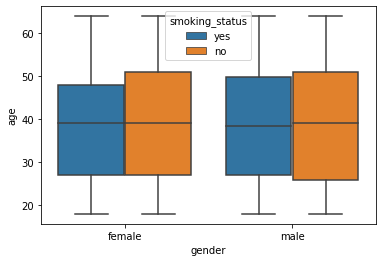

In [319]:
sns.boxplot(x=df['gender'],y=df['age'],hue=df['smoking_status'])

In [320]:
df.groupby(['gender','smoking_status'])['age'].mean()

gender  smoking_status
female  no                39.507347
        yes               38.535391
male    no                39.046544
        yes               38.628689
Name: age, dtype: float64

# Observations:
1. male persons who smokers have avg age more as compared to female smokers avg age.
2. female persons who do not smokers have avg age more as compared to avg age of male persons who do not smokers.

<AxesSubplot:xlabel='location', ylabel='BMI'>

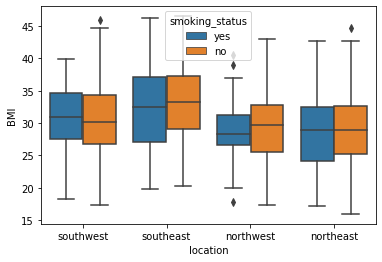

In [321]:
sns.boxplot(x=df['location'],y=df['BMI'],hue=df['smoking_status'])

# Observations:
1. In southeast location, avg BMI of smoker and non-smoker persons are high as compared to other locations.

<AxesSubplot:xlabel='location', ylabel='age'>

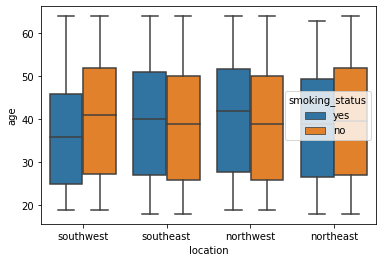

In [322]:
sns.boxplot(x=df['location'],y=df['age'],hue=df['smoking_status'])

# Observations:
1. In nothwest location, avg age of smokers persons are high as compared to other locations.
2. In southwest location, avg age of non-smokers persons are high as compared to other locations.

<AxesSubplot:xlabel='location', ylabel='health_insurance_price'>

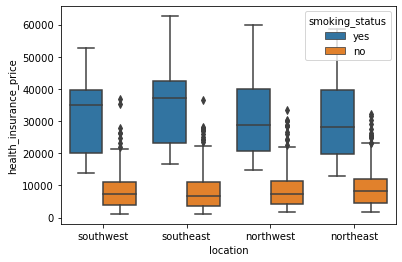

In [323]:
sns.boxplot(x=df['location'],y=df['health_insurance_price'],hue=df['smoking_status'])

# Observations:
1. In southwest location, avg health_insureance_price of smokers persons are high as compared to other locations.

<AxesSubplot:xlabel='Children', ylabel='health_insurance_price'>

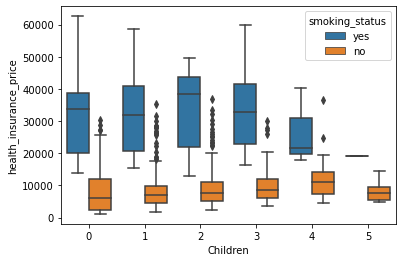

In [324]:
sns.boxplot(x=df['Children'],y=df['health_insurance_price'],hue=df['smoking_status'])

# Observations:
1. person having two children and who smoke have high avg health_insurance_price
2. person having no children and who don't smoke have low avg health_insurance_price


<AxesSubplot:xlabel='Children', ylabel='age'>

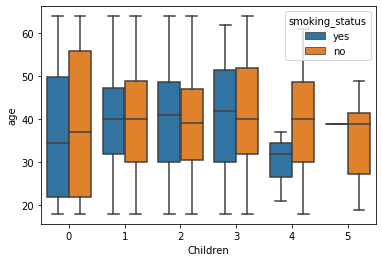

In [325]:
sns.boxplot(x=df['Children'],y=df['age'],hue=df['smoking_status'])

# Observations:
1. person having one children and who do not smoke have more avg age.
2. person having three children and who smoke have more avg age.


<AxesSubplot:xlabel='location', ylabel='health_insurance_price'>

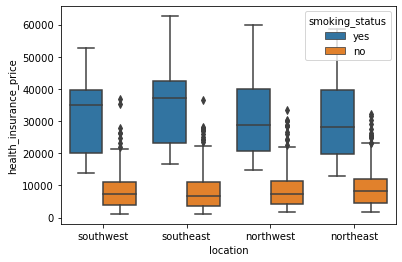

In [326]:
sns.boxplot(x=df['location'],y=df['health_insurance_price'],hue=df['smoking_status'])

In [327]:
df.groupby(['location','smoking_status'])['health_insurance_price'].mean()

location   smoking_status
northeast  no                 9164.487165
           yes               29673.536473
northwest  no                 8556.463715
           yes               30291.236597
southeast  no                 8042.647356
           yes               34411.493087
southwest  no                 8019.148245
           yes               32026.178450
Name: health_insurance_price, dtype: float64

# Observations:
1. person living in southeast and who smoke have high avg health_insurance_price 
2. person living in southeast and who don't smoke have low avg health_insurance_price 

<AxesSubplot:xlabel='location', ylabel='health_insurance_price'>

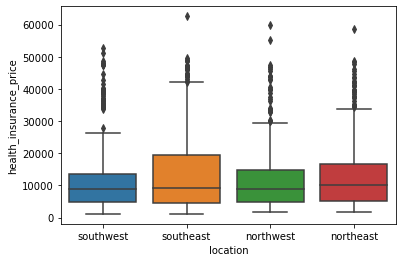

In [328]:
sns.boxplot(x=df['location'],y=df['health_insurance_price'])

In [329]:
df.groupby('location')['health_insurance_price'].mean()

location
northeast    13418.686248
northwest    12380.173759
southeast    14634.858789
southwest    12268.839927
Name: health_insurance_price, dtype: float64

# Observations:
1. person living in southeast have high avg health_insurance_price 
2. person living in southwest have low avg health_insurance_price 

<AxesSubplot:xlabel='gender', ylabel='BMI'>

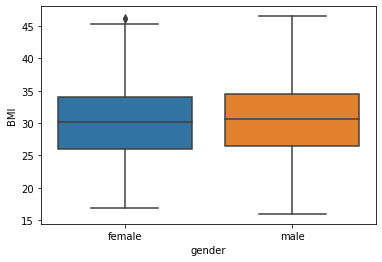

In [330]:
sns.boxplot(x=df['gender'],y=df['BMI'])

In [331]:
df.groupby('gender')['BMI'].mean()

gender
female    30.220125
male      30.749809
Name: BMI, dtype: float64

# Observations:
1. Male persons have high average BMI as comapred to female persons avg age. 

<AxesSubplot:xlabel='gender', ylabel='health_insurance_price'>

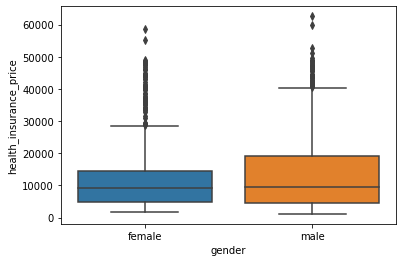

In [332]:
sns.boxplot(x=df['gender'],y=df['health_insurance_price'])

In [333]:
df.groupby('gender')['health_insurance_price'].mean()

gender
female    12428.472067
male      13980.434178
Name: health_insurance_price, dtype: float64

# Observations:
1. Female persons have high avg health_insurance_price as compared to male persons


In [334]:
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.638217,0,yes,southwest,16884.92400
1,18.0,male,33.770000,1,no,southeast,1725.55230
2,28.0,male,33.000000,3,no,southeast,4449.46200
3,33.0,male,22.705000,0,no,northwest,21984.47061
4,32.0,male,28.880000,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970000,3,no,northwest,10600.54830
1334,18.0,female,31.920000,0,no,northeast,2205.98080
1335,18.0,female,36.850000,0,no,southeast,1629.83350
1336,21.0,female,25.800000,0,no,southwest,2007.94500


In [335]:
label_df=df.groupby(['gender','smoking_status'])['health_insurance_price'].mean().index


In [336]:
label_df

MultiIndex([('female',  'no'),
            ('female', 'yes'),
            (  'male',  'no'),
            (  'male', 'yes')],
           names=['gender', 'smoking_status'])

In [337]:
val_df=df.groupby(['gender','smoking_status'])['health_insurance_price'].mean().values


In [338]:
val_df

array([ 8748.92048171, 30300.57976973,  8109.06636667, 32969.47817639])

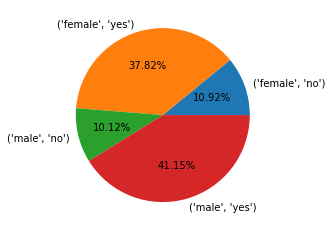

In [339]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. male persons who smoke  have highest avg health_insurance_price as compared to other persons smoker and non-smoker.
2. male persons who do not smoke  have lowest avg health_insurance_price as compared to other persons smoker and non-smoker.


In [340]:
label_df=df.groupby(['smoking_status','location'])['health_insurance_price'].mean().index


In [341]:
label_df

MultiIndex([( 'no', 'northeast'),
            ( 'no', 'northwest'),
            ( 'no', 'southeast'),
            ( 'no', 'southwest'),
            ('yes', 'northeast'),
            ('yes', 'northwest'),
            ('yes', 'southeast'),
            ('yes', 'southwest')],
           names=['smoking_status', 'location'])

In [342]:
val_df=df.groupby(['smoking_status','location'])['health_insurance_price'].mean().values


In [343]:
val_df

array([ 9164.48716535,  8556.46371521,  8042.64735633,  8019.14824525,
       29673.53647284, 30291.23659702, 34411.49308697, 32026.17844965])

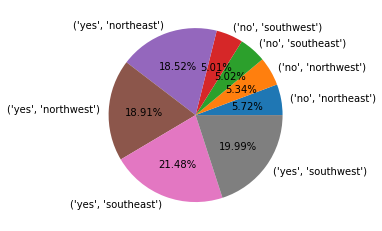

In [344]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. persons who smoke  and live in southeast have highest avg health_insurance_price as compared to other persons smoker and non-smoker from different location.
2. persons who do not smoke  and live in southeast have lowest avg health_insurance_price as compared to other persons smoker and non-smoker from different location.



In [345]:
label_df=df.groupby(['smoking_status','Children'])['health_insurance_price'].mean().index


In [346]:
label_df

MultiIndex([( 'no', 0),
            ( 'no', 1),
            ( 'no', 2),
            ( 'no', 3),
            ( 'no', 4),
            ( 'no', 5),
            ('yes', 0),
            ('yes', 1),
            ('yes', 2),
            ('yes', 3),
            ('yes', 4),
            ('yes', 5)],
           names=['smoking_status', 'Children'])

In [347]:
val_df=df.groupby(['smoking_status','Children'])['health_insurance_price'].mean().values


In [348]:
val_df

array([ 7617.65503844,  8335.56221799,  9482.24581055,  9614.51939093,
       12121.34440818,  7908.30249687, 31056.89847947, 31611.3419365 ,
       33788.37277302, 32724.91526821, 26532.27693333, 19023.26      ])

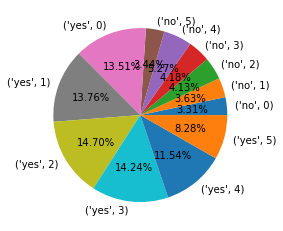

In [349]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. persons who smoke  and have 3 childrens have highest avg health_insurance_price as compared to other persons smoker and non-smoker with different number of children.
2. persons who do not smoke  and have 5 childrens have lowest avg health_insurance_price as compared to other persons smoker and non-smoker with different number of children.

In [78]:
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.638217,0,yes,southwest,16884.92400
1,18.0,male,33.770000,1,no,southeast,1725.55230
2,28.0,male,33.000000,3,no,southeast,4449.46200
3,33.0,male,22.705000,0,no,northwest,21984.47061
4,32.0,male,28.880000,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970000,3,no,northwest,10600.54830
1334,18.0,female,31.920000,0,no,northeast,2205.98080
1335,18.0,female,36.850000,0,no,southeast,1629.83350
1336,21.0,female,25.800000,0,no,southwest,2007.94500


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Children', ylabel='Density'>

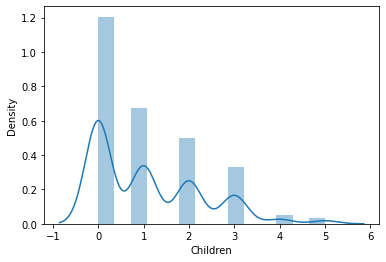

In [79]:
sns.distplot(df['Children'])

In [80]:
df['Children']=np.log(df['Children'])

C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\himanshu\AppData\Local\Temp\ipykernel_19132\2715789916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Children']=np.log(df['Children'])


In [81]:
df=df[df['Children']>0]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Children', ylabel='Density'>

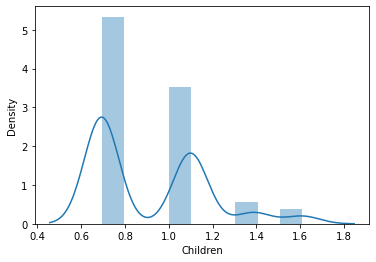

In [82]:
sns.distplot(df['Children'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

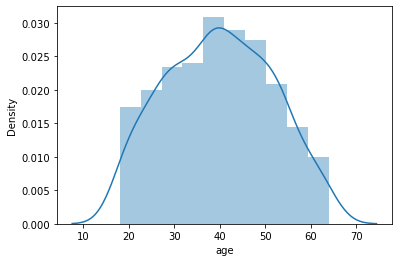

In [83]:
sns.distplot(df['age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

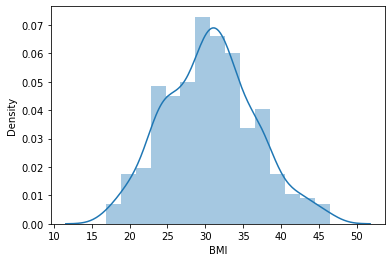

In [84]:
sns.distplot(df['BMI'])

In [85]:
le=LabelEncoder()


In [86]:
df['gender']=le.fit_transform(df['gender'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_19132\3002396164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']=le.fit_transform(df['gender'])


In [87]:
df['smoking_status']=le.fit_transform(df['smoking_status'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_19132\1664391057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status']=le.fit_transform(df['smoking_status'])


In [88]:
df['location']=le.fit_transform(df['location'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_19132\3837753850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location']=le.fit_transform(df['location'])


In [89]:
df=df[df['health_insurance_price']>0]

In [90]:
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
2,28.0,1,33.000,1.098612,0,2,4449.46200
7,37.0,0,27.740,1.098612,0,1,7281.50560
8,37.0,1,29.830,0.693147,0,0,6406.41070
24,37.0,1,28.025,0.693147,0,1,6203.90175
25,59.0,0,27.720,1.098612,0,2,14001.13380
...,...,...,...,...,...,...,...
1328,23.0,0,24.225,0.693147,0,0,22395.74424
1329,52.0,1,38.600,0.693147,0,3,10325.20600
1330,57.0,0,25.740,0.693147,0,2,12629.16560
1332,52.0,0,44.700,1.098612,0,3,11411.68500


In [91]:
y=df['health_insurance_price']

In [92]:
X=df.drop('health_insurance_price',axis=1)

In [93]:
sc=StandardScaler()


In [94]:
X=sc.fit_transform(X)

In [95]:
lr=LinearRegression()


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [97]:
lr.fit(X_train,y_train)

LinearRegression()

In [98]:
y_pred=lr.predict(X_test)


In [99]:
r2_score(y_test,y_pred)

0.7159793882566725

In [100]:
rfr=RandomForestRegressor()


In [101]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
y_pred=rfr.predict(X_test)


In [103]:
r2_score(y_test,y_pred)

0.7947037818542975

In [104]:
knr=KNeighborsRegressor()


In [105]:
knr.fit(X_train,y_train)

KNeighborsRegressor()

In [106]:
y_pred=knr.predict(X_test)


In [107]:
r2_score(y_test,y_pred)

0.7424836202317726

In [108]:
dtr=DecisionTreeRegressor()


In [109]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [110]:
y_pred=dtr.predict(X_test)


In [111]:
r2_score(y_test,y_pred)

0.690331152474249

In [112]:
xgb_i=xgb.XGBRegressor()

In [113]:
xgb_i.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [114]:
y_pred=xgb_i.predict(X_test)


In [115]:
r2_score(y_test,y_pred)

0.7804843018347746